# Introduction to Natural Language Processing and NLTK

Agenda today:
- Text analytics and NLP
- Pre-Prosessing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
- Feature Engineering for NLP
    - Bag-of-Words
    - Term frequency-Inverse Document Frequency (tf-idf)
- Text Classification

## Part I. Text Analytics and NLP
NLP allows computers to interact with text data in a structured and sensible way. In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing is:
- Chatbots 
- Classifying documents 
- Speech recognition and audio processing 
In this section, we will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

#### Overview of NLP process 
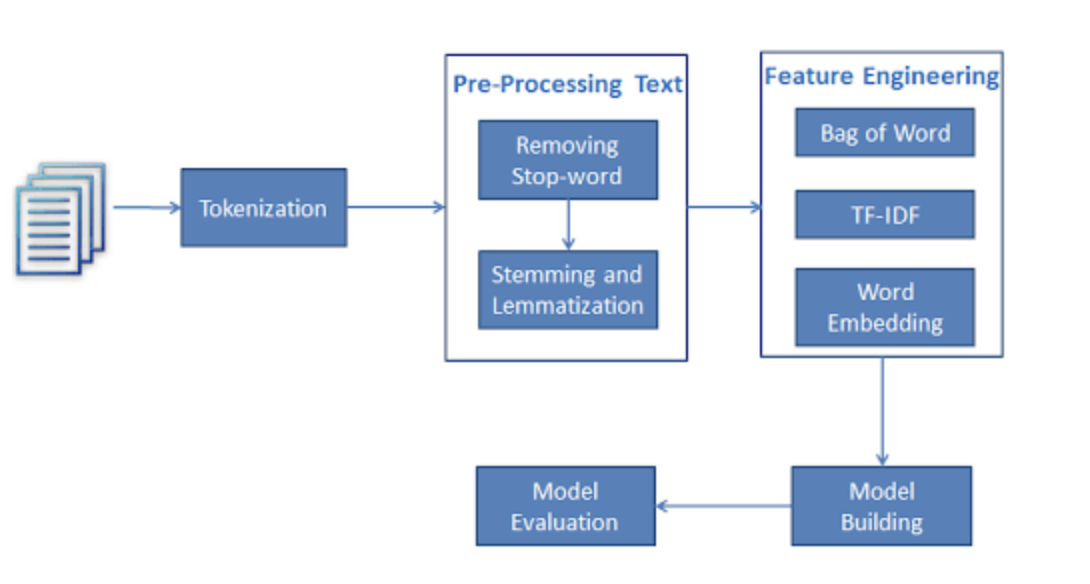

## Part II. Pre-Prosessing for NLP

In [2]:

review = 'From the beginning of the movie, it gives the feeling the director is trying to portray something, what I mean to say that instead of the story dictating the style in which the movie should be made, he has gone in the opposite way, he had a type of move that he wanted to make, and wrote a story to suite it. And he has failed in it very badly. I guess he was trying to make a stylish movie. Any way I think this movie is a total waste of time and effort. In the credit of the director, he knows the media that he is working with, what I am trying to say is I have seen worst movies than this. Here at least the director knows to maintain the continuity in the movie. And the actors also have given a decent performance.'

In [3]:
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/flee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/flee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenization 
Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as n-gram, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "Vishal works here" can be tokenized into?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(review)

The RegexpTokenizer is a tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [8]:
print(tokenized_review)

['From', 'the', 'beginning', 'of', 'the', 'movie', 'it', 'gives', 'the', 'feeling', 'the', 'director', 'is', 'trying', 'to', 'portray', 'something', 'what', 'I', 'mean', 'to', 'say', 'that', 'instead', 'of', 'the', 'story', 'dictating', 'the', 'style', 'in', 'which', 'the', 'movie', 'should', 'be', 'made', 'he', 'has', 'gone', 'in', 'the', 'opposite', 'way', 'he', 'had', 'a', 'type', 'of', 'move', 'that', 'he', 'wanted', 'to', 'make', 'and', 'wrote', 'a', 'story', 'to', 'suite', 'it', 'And', 'he', 'has', 'failed', 'in', 'it', 'very', 'badly', 'I', 'guess', 'he', 'was', 'trying', 'to', 'make', 'a', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'this', 'movie', 'is', 'a', 'total', 'waste', 'of', 'time', 'and', 'effort', 'In', 'the', 'credit', 'of', 'the', 'director', 'he', 'knows', 'the', 'media', 'that', 'he', 'is', 'working', 'with', 'what', 'I', 'am', 'trying', 'to', 'say', 'is', 'I', 'have', 'seen', 'worst', 'movies', 'than', 'this', 'Here', 'at', 'least', 'the', 'director', 'knows

In [9]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 78 samples and 145 outcomes>


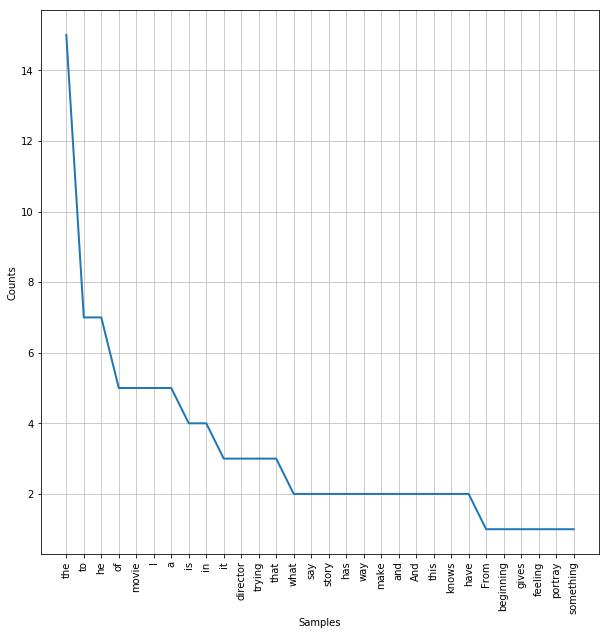

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
fdist.plot(30)

Are the words very informative? If we were to extract informatiom based on this frequency distribution of the most common words in tis graph, are we going to get some helpful information or not? Why or why not?

### Stopwords Removal

In [12]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'about', 'your', "hadn't", 'now', 'doing', 'before', 'am', "you'll", 'below', 'them', 'the', 'hasn', 'me', 'yourself', 'had', 'off', 'ain', "needn't", 'mustn', 'itself', 'couldn', 've', 'yours', 'than', 'again', 'doesn', 's', 'only', 'from', 'she', 'did', 'down', 'to', 'some', "wouldn't", 'is', 'each', 't', 'as', 'yourselves', 'over', 'shan', 'too', 'haven', 'it', "hasn't", 'up', 'once', 'they', "wasn't", 'aren', 'having', 'all', 'being', 'those', 'are', 'after', 'i', 'where', 'he', 'out', "haven't", 'm', 'then', 'which', 'shouldn', 'don', 'didn', "shouldn't", 'but', 'while', 'can', 'mightn', 'so', 'few', 'during', "that'll", 'just', 'was', 'this', 'any', "don't", 'her', 'most', 'does', 'nor', 'ourselves', "you're", 'or', 're', "you'd", 'these', 'further', "mustn't", 'him', 'into', 'who', 'when', 'its', 'why', 'not', 'o', 'themselves', 'more', "didn't", 'between', 'will', 'herself', 'here', 'both', "aren't", 'what', 'that', 'at', 'ma', 'theirs', 'a', 'above', 'have', 'same', 'myself',

In [13]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
print("Filterd Sentence:",filtered_review)

Filterd Sentence: ['From', 'beginning', 'movie', 'gives', 'feeling', 'director', 'trying', 'portray', 'something', 'I', 'mean', 'say', 'instead', 'story', 'dictating', 'style', 'movie', 'made', 'gone', 'opposite', 'way', 'type', 'move', 'wanted', 'make', 'wrote', 'story', 'suite', 'And', 'failed', 'badly', 'I', 'guess', 'trying', 'make', 'stylish', 'movie', 'Any', 'way', 'I', 'think', 'movie', 'total', 'waste', 'time', 'effort', 'In', 'credit', 'director', 'knows', 'media', 'working', 'I', 'trying', 'say', 'I', 'seen', 'worst', 'movies', 'Here', 'least', 'director', 'knows', 'maintain', 'continuity', 'movie', 'And', 'actors', 'also', 'given', 'decent', 'performance']


In [14]:
print(len(tokenized_review))
print(len(filtered_review))

145
72


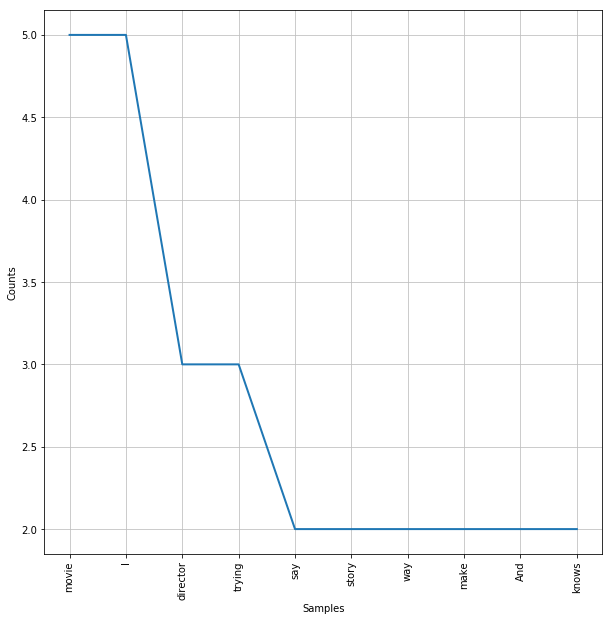

In [16]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(10,10))
fdist.plot(10)

Now that we have removed semantically meaningless words, can we possibly have other types of problem?

#### Lexicon Normalization 
Aside from stopwords, a different type of noise can arise in NLP. For example, collect, collection, collected, and collecting are all similar words. Using stemming and lemmatization would reduce all variations of the same word to the root version of all its derivations. 

###### Stemming 
Stemming allows us to remove different variations of the same word. For example, collect, collection and collecting will all be reduced to the same single word.
- Stemming is the process of reducing inflection in words to their root forms, such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.
 
- Stems are created by removing the suffixes or prefixes used with a word.


In [ ]:
# Stemming
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()

stemmed_review=[]
for w in filtered_review:
    stemmed_review.append(ps.stem(w))

print(stemmed_review)

In [ ]:
fdist = FreqDist(stemmed_review)
fdist.plot(30)

#### Lemmatization
The only difference between lemmatization and stemming is that lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.



In [17]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/flee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
print("movies:", lemmatizer.lemmatize("movies")) 
print("collecting:", lemmatizer.lemmatize("collecting")) 
print("collection:", lemmatizer.lemmatize("collection")) 
print("collections:", lemmatizer.lemmatize("collections")) 

movies: movie
collecting: collecting
collection: collection
collections: collection


In [19]:
# comparing it with stemming 
print("movies:", ps.stem("movies")) 
print("collecting :", ps.stem("collecting")) 

NameError: name 'ps' is not defined

In [ ]:
# we can also lemmatize our original reviews
lemmatized_review=[]
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))

print(lemmatized_review)

## Part III. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called Bag-of-words (BoW). 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"

Can be represented as:
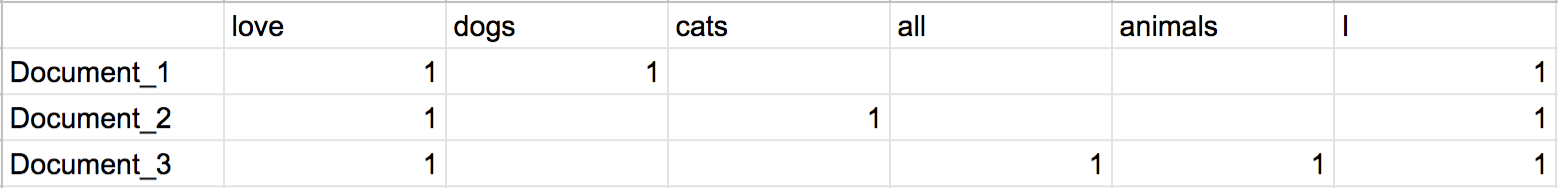

In [20]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

docs = ['I love dogs','I love cats','I love all animals']
vec = CountVectorizer(stop_words=None)
X = vec.fit_transform(docs)


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,all,animals,cats,dogs,love
0,0,0,0,1,1
1,0,0,1,0,1
2,1,1,0,0,1


In [21]:
vec.get_feature_names()

['all', 'animals', 'cats', 'dogs', 'love']

### TF-TDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

- TF (Term Frequency)
term frequency is simply the frequency of words in a document, and it can be represented as the number of times a term shows up in a document. 

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number of documents}{num of documents containing W})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [22]:
# let's implement it 
import pandas as pd
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['review'])


In [24]:
type(text_counts)

scipy.sparse.csr.csr_matrix

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['review'])
text_tf.data

array([0.27706956, 0.13853478, 0.13263743, 0.06926739, 0.08842496,
       0.20780217, 0.13263743, 0.35369982, 0.06926739, 0.13853478,
       0.06926739, 0.06926739, 0.13263743, 0.26527487, 0.13263743,
       0.06926739, 0.10922241, 0.05461121, 0.06926739, 0.0361466 ,
       0.05461121, 0.21687959, 0.10922241, 0.06926739, 0.06926739,
       0.08842496, 0.06926739, 0.06926739, 0.06926739, 0.20780217,
       0.06926739, 0.06926739, 0.05461121, 0.05461121, 0.0361466 ,
       0.14458639, 0.06926739, 0.06926739, 0.05461121, 0.08842496,
       0.20780217, 0.05461121, 0.06926739, 0.05461121, 0.06926739,
       0.05461121, 0.06926739, 0.05461121, 0.04421248, 0.06926739,
       0.06926739, 0.14458639, 0.05461121, 0.04421248, 0.05461121,
       0.06926739, 0.06926739, 0.06926739, 0.06926739, 0.05461121,
       0.04421248, 0.13263743, 0.06926739, 0.05461121, 0.06926739,
       0.04421248, 0.06926739, 0.06926739, 0.04421248, 0.06926739,
       0.05461121, 0.10922241, 0.06926739, 0.06926739, 0.06926

In [26]:
# what does this function do?
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

def fn_tdm_df(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df



In [27]:
fn_tdm_df(df['review']).T

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,4,1,2,0,0,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,1,1,1


In [28]:
# what about this function?
def fn_tdm_tfidf(docs, xColNames = None, **kwargs):
    ''' create a term document matrix as pandas DataFrame
    with **kwargs you can pass arguments of CountVectorizer
    if xColNames is given the dataframe gets columns Names'''

    #initialize the  vectorizer
    tf = TfidfVectorizer(**kwargs)
    x1 = tf.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = tf.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df

In [29]:
fn_tdm_tfidf(df['review']).transpose()

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,0.27707,0.069267,0.138535,0.000000,0.000000,0.000000,0.000000,0.138535,0.000000,0.000000,...,0.000000,0.000000,0.069267,0.000000,0.000000,0.069267,0.044212,0.000000,0.054611,0.000000
1,0.00000,0.000000,0.000000,0.042847,0.000000,0.000000,0.000000,0.000000,0.042847,0.042847,...,0.000000,0.000000,0.000000,0.042847,0.000000,0.000000,0.027349,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067858,0.000000,0.000000,0.086069,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.059012,0.059012,0.000000,0.000000,0.000000,...,0.059012,0.046525,0.000000,0.000000,0.000000,0.000000,0.037666,0.059012,0.046525,0.059012


## Next steps
Now that you have a great basic understanding of feature engineering and preprosessing in NLP, we can move on to text classification using Naive Bayes and other classification algorithm. We can treat the engineered dataframes like any other dataframes that you have worked with before. For Naive Bayes, you can calculate the posterior probability of belonging in that class given that a certain word has occurred. You can then classify the document to be in the class with the highest posterior probability. 